In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
import scipy.ndimage as ndi
import h5py
from scipy.stats import entropy
# import tifffile

#Set fixed random number generator for reproducibility.
RNG = np.random.default_rng(seed=20250113)

#How many Monte-Carlo sample we generate.
SAMPLES = 100

def norm(img):
    simg = img-np.min(img)
    return simg/np.sum(simg)

def get_background(raw_image : np.ndarray, roi : tuple, plot=True):
    bckg_data = raw_image[roi]
    bmean = np.mean(bckg_data.ravel())
    bstd = np.std(bckg_data)

    if plot:
        fig, ax = plt.subplots(1,2)        
        ax[0].matshow(raw_image)
        rect = plt.Rectangle((roi[1].start, roi[0].start), roi[1].stop - roi[1].start, roi[0].stop - roi[0].start, 
                            edgecolor='red', facecolor='none', linewidth=2)
        ax[0].add_patch(rect)
        ax[1].hist(bckg_data.ravel())
        print(np.mean(bckg_data), np.std(bckg_data))
        plt.show()

    return np.mean(bckg_data), np.std(bckg_data)

def resample_image(raw_image, bmean, bstd, samples=SAMPLES):
    """Resample raw camera image with known levels and stddev of background, assuming poissonian statistics of the emitters."""
    monte_carlo_frames_bckg = RNG.normal(bmean, scale=bstd, size=(SAMPLES,*raw_image.shape))
    monte_carlo_frames_emitters = RNG.poisson(
        np.clip(raw_image - bmean, 0, None),
        size=(samples,*raw_image.shape)
    )
    return monte_carlo_frames_bckg + monte_carlo_frames_emitters


h5_files = {
    1: 'Image1.h5',
    2: 'Image2.h5',
    3: 'Image3.h5'
}
bckgh5_files = {
    1: 'resampled/Image1_bckg.h5',
    2: 'resampled/Image2_bckg.h5',
    3: 'resampled/Image3_bckg.h5'
}

keys_template = ['img{n}_camera_image', 'img{n}_R-L', 'img{n}_MEF', 'img{n}_CFCNN', 'img{n}_ground_truth']
bckg_keys_template = ['image{n}_bleached']



## Image 1

132.07 10.564331498017278


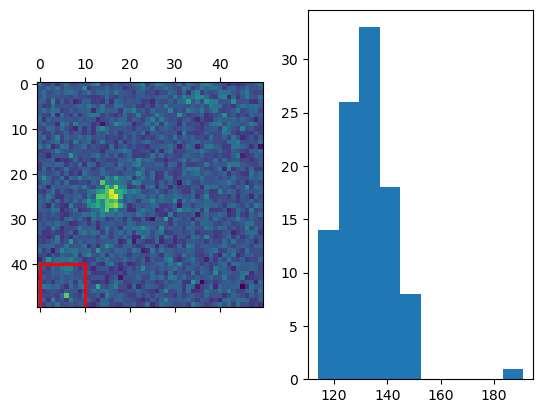

In [10]:
# Select background area
n = 1
with h5py.File(h5_files[n], 'r') as h5f:
    raw_image = np.array(h5f[f'img{n}_camera_image'])

with h5py.File(bckgh5_files[n], 'r') as h5f:
    bckg_image = np.array(h5f[f'image{n}_bleached'])
    
roi = np.s_[40:50, 0:10]

#extract backgrount from the acquired image
#by means of manual selection
bmean, bstd = get_background(bckg_image, roi, plot=True)

resampled_images = resample_image(raw_image, bmean, bstd, SAMPLES)
normed_resampled_imgs = np.array([norm(frame) for frame in resampled_images])


with h5py.File(f'resampled/mc_img{n}.h5', 'w') as h5f:
    h5f.create_dataset('resampled', data = normed_resampled_imgs.astype(np.float32))
    h5f.create_dataset('original', data = norm(raw_image).astype(np.float32).reshape((1,50,50)))


## Image 2

702.39 41.749465864846705


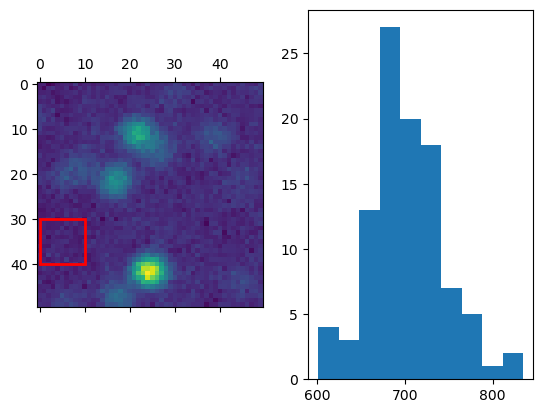

In [11]:
# Select background area
n = 2
with h5py.File(h5_files[n], 'r') as h5f:
    raw_image = np.array(h5f[f'img{n}_camera_image'])

with h5py.File(bckgh5_files[n], 'r') as h5f:
    bckg_image = np.array(h5f[f'image{n}_bleached'])
    
roi = np.s_[30:40, 0:10]

#extract backgrount from the acquired image
#by means of manual selection
bmean, bstd = get_background(bckg_image, roi, plot=True)

resampled_images = resample_image(raw_image, bmean, bstd, SAMPLES)
normed_resampled_imgs = np.array([norm(frame) for frame in resampled_images])


with h5py.File(f'resampled/mc_img{n}.h5', 'w') as h5f:
    h5f.create_dataset('resampled', data = normed_resampled_imgs.astype(np.float32))
    h5f.create_dataset('original', data = norm(raw_image).astype(np.float32).reshape((1,50,50)))


## Image 3

898.58 52.353639797057085


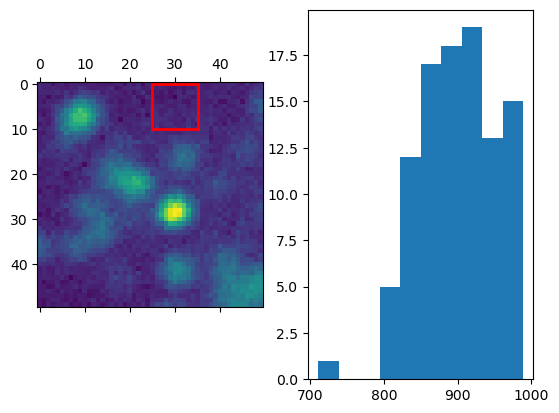

In [12]:
# Select background area
n = 3
with h5py.File(h5_files[n], 'r') as h5f:
    raw_image = np.array(h5f[f'img{n}_camera_image'])

with h5py.File(bckgh5_files[n], 'r') as h5f:
    bckg_image = np.array(h5f[f'image{n}_bleached'])
    
roi = np.s_[0:10, 25:35]

#extract backgrount from the acquired image
#by means of manual selection
bmean, bstd = get_background(bckg_image, roi, plot=True)
resampled_images = resample_image(raw_image, bmean, bstd, SAMPLES)
normed_resampled_imgs = np.array([norm(frame) for frame in resampled_images])

with h5py.File(f'resampled/mc_img{n}.h5', 'w') as h5f:
    h5f.create_dataset('resampled', data = normed_resampled_imgs.astype(np.float32))
    h5f.create_dataset('original', data = norm(raw_image).astype(np.float32).reshape((1,50,50)))
